In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime

[Univariate Time Series Anomaly Detection Using ARIMA Model](https://www.analyticsvidhya.com/blog/2021/08/univariate-time-series-anomaly-detection-using-arima-model/)

In [2]:
df=pd.read_csv('cpu4.csv')
for i in range(len(df)):
    df['timestamp'].iloc[i]=datetime.datetime.fromtimestamp(df['timestamp'].iloc[i]) #We are given the timestamp as a unix code
cols=[i for i in df.columns if i not in ['timestamp']]
for col in cols:
    df[col]=pd.to_numeric(df[col])
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.tail()

/Users/khalidalnahyan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


timestamp     value  label
17563 2016-09-23 19:35:00  0.074292      0
17564 2016-09-23 19:40:00  0.295152      0
17565 2016-09-23 19:45:00  0.074292      0
17566 2016-09-23 19:50:00 -0.146567      0
17567 2016-09-23 19:55:00 -0.036137      0

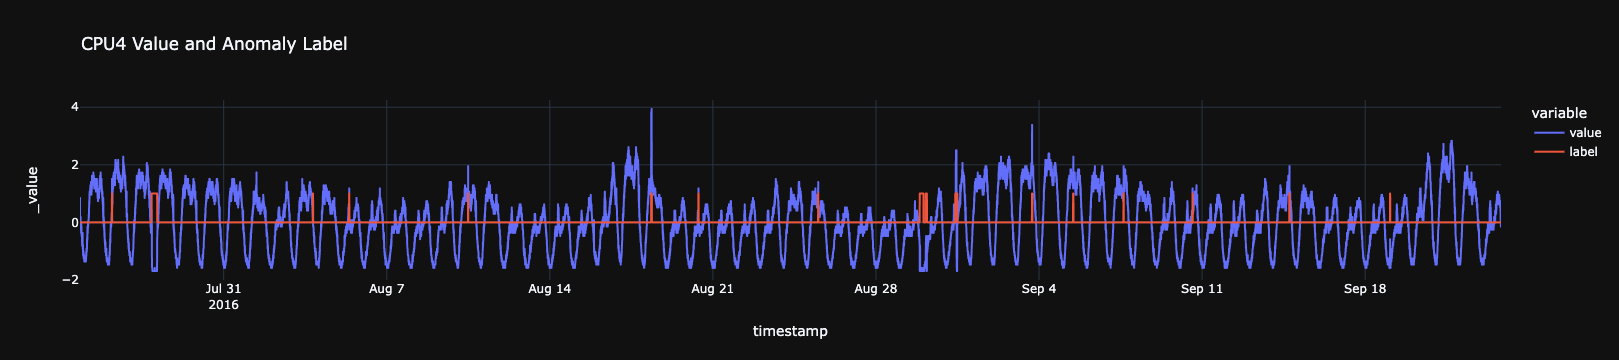

In [3]:
import plotly.express as px
fig = px.line(df, x="timestamp", y=['value', 'label'], title='CPU4 Value and Anomaly Label', template='plotly_dark')
fig.show()

[Python | ARIMA Model for Time Series Forecasting](https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/)

In [4]:
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [5]:
stepwise_fit = auto_arima(df['value'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=51.63 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=16898.492, Time=2.29 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-11618.918, Time=16.62 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=5645.405, Time=11.30 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=16896.495, Time=1.57 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-7003.725, Time=6.47 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-13123.275, Time=40.18 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=96.07 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=59.04 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=13028.848, Time=15.88 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=-15261.409, Time=71.25 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=-13736.391, Time=32.16 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=98.33 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=47.65 sec
 ARIMA(3,0,0)(2,1,0)[

In [6]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                17568
Model:             SARIMAX(3, 0, 3)x(2, 1, [], 12)   Log Likelihood                7989.264
Date:                             Mon, 25 Jul 2022   AIC                         -15960.528
Time:                                     11:18:27   BIC                         -15890.569
Sample:                                          0   HQIC                        -15937.494
                                           - 17568                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0375      0.068     29.768      0.000       1.903       2.172
ar.L2         -1.3316      0.129    -10.344      0.000      -1.584      -1.079
ar.L3          0.2896      0.061      4.744      0.000       0.170       0.409
ma.L1         -1.4737      0.070    -21.096      0.000      -1.611      -1.337
ma.L2          0.7282      0.094      7.735      0.000       0.544       0.913
ma.L3         -0.0668      0.032     -2.078      0.038      -0.130      -0.004
ar.S.L12      -0.6561      0.004   -150.101      0.000      -0.665      -0.648
ar.S.L24      -0.2956      0.004    -68.231      0.000      -0.304      -0.287
sigma2         0.0236      0.000    228.287      0.000       0.023       0.024
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            205658.61
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.26
Prob(H) (two-sided):                  0.50   Kurtosis:                        19.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
# Split data into train / test sets
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:] # set one year(12 months) for testing

In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [9]:
model = SARIMAX(train['value'], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 12))

In [10]:
result = model.fit()
result.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.24478D-01    |proj g|=  1.83369D+00

At iterate    5    f= -4.69191D-01    |proj g|=  3.70100D-01

At iterate   10    f= -5.42649D-01    |proj g|=  2.64480D-01

At iterate   15    f= -5.61300D-01    |proj g|=  2.07841D-01

At iterate   20    f= -5.68276D-01    |proj g|=  1.00939D-02

At iterate   25    f= -5.68889D-01    |proj g|=  7.23424D-03

At iterate   30    f= -5.68913D-01    |proj g|=  1.59473D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     73      2     0     0   1.105D-04  -5.689D-01
  F = -0.56891653293119393     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                17556
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                9987.899
Date:                            Mon, 25 Jul 2022   AIC                         -19965.797
Time:                                    11:19:22   BIC                         -19926.935
Sample:                                         0   HQIC                        -19953.002
                                          - 17556                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3732      0.002   -162.671      0.000      -0.378      -0.369
ar.S.L12       0.0486      0.005      8.934      0.000       0.038       0.059
ar.S.L24       0.0676      0.006     10.766      0.000       0.055       0.080
ma.S.L12      -0.9995      0.002   -452.822      0.000      -1.004      -0.995
sigma2         0.0187   7.33e-05    254.591      0.000       0.019       0.019
===================================================================================
Ljung-Box (L1) (Q):                   3.54   Jarque-Bera (JB):            331424.00
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                            -0.07
Prob(H) (two-sided):                  0.83   Kurtosis:                        24.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

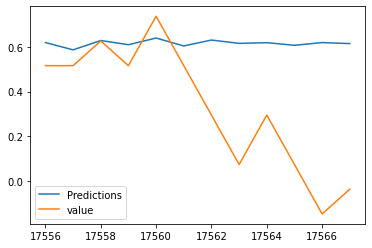

In [11]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['value'].plot(legend = True)

In [12]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
rmse=rmse(test["value"], predictions)

# Calculate mean squared error
mse=mean_squared_error(test["value"], predictions)

print(f"Root Mean Squared Error: {round(rmse, 5)}")
print(f"Mean Squared Error: {round(mse, 5)}")

Root Mean Squared Error: 0.39219
Mean Squared Error: 0.15381


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.24381D-01    |proj g|=  1.83238D+00

At iterate    5    f= -4.69377D-01    |proj g|=  3.70113D-01

At iterate   10    f= -5.22550D-01    |proj g|=  3.44184D-01

At iterate   15    f= -5.63055D-01    |proj g|=  2.36129D-01

At iterate   20    f= -5.68037D-01    |proj g|=  1.03813D-01

At iterate   25    f= -5.68640D-01    |proj g|=  7.07182D-03

At iterate   30    f= -5.68684D-01    |proj g|=  2.00053D-03

At iterate   35    f= -5.68689D-01    |proj g|=  5.94628D-03

At iterate   40    f= -5.68690D-01    |proj g|=  1.05423D-03

At iterate   45    f= -5.68690D-01    |proj g|=  1.93851D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

<AxesSubplot:>

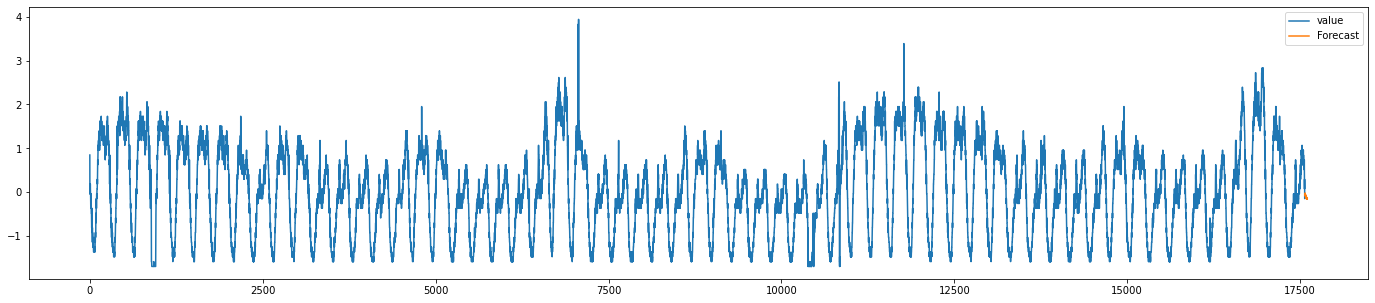

In [13]:
# Train the model on the full dataset
model = model = SARIMAX(df['value'], 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast = result.predict(start = len(df), 
                          end = (len(df)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
df['value'].plot(figsize = (24, 5), legend = True)
forecast.plot(legend = True)

In [14]:
# Instructions instead of predicting the testing dataset, predict the complete signal

In [15]:
# Train the model on the full dataset
model2 = model = SARIMAX(df['value'], 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 12))
result2 = model2.fit()
  
# Forecast for the next 3 years
forecast2 = result2.predict(start = 0, 
                          end = (len(df)-1), 
                          typ = 'levels').rename('Forecast2')

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.24381D-01    |proj g|=  1.83238D+00

At iterate    5    f= -4.69377D-01    |proj g|=  3.70113D-01

At iterate   10    f= -5.22550D-01    |proj g|=  3.44184D-01

At iterate   15    f= -5.63055D-01    |proj g|=  2.36129D-01

At iterate   20    f= -5.68037D-01    |proj g|=  1.03813D-01

At iterate   25    f= -5.68640D-01    |proj g|=  7.07182D-03

At iterate   30    f= -5.68684D-01    |proj g|=  2.00053D-03

At iterate   35    f= -5.68689D-01    |proj g|=  5.94628D-03

At iterate   40    f= -5.68690D-01    |proj g|=  1.05423D-03

At iterate   45    f= -5.68690D-01    |proj g|=  1.93851D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

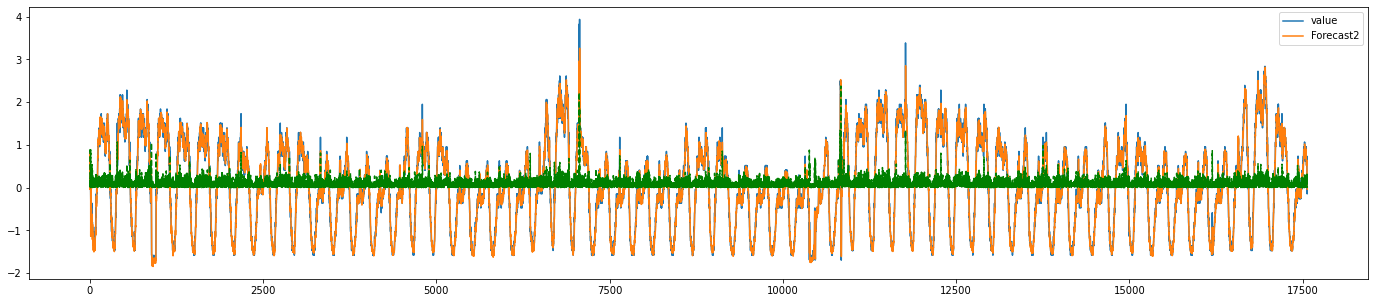

In [16]:
difference=abs(df['value']-forecast2)
# Plot the forecast values
df['value'].plot(figsize = (24, 5), legend = True)
forecast2.plot(legend = True)
plt.plot(difference, 'g--', label='difference')
#plt.savefigure("Forcast for all the data.png")

In [17]:
print(difference.max())
print(difference.min())
threshold=difference.max()*0.6
print(threshold)

2.3780248480101953
1.4676771326049831e-09
1.426814908806117


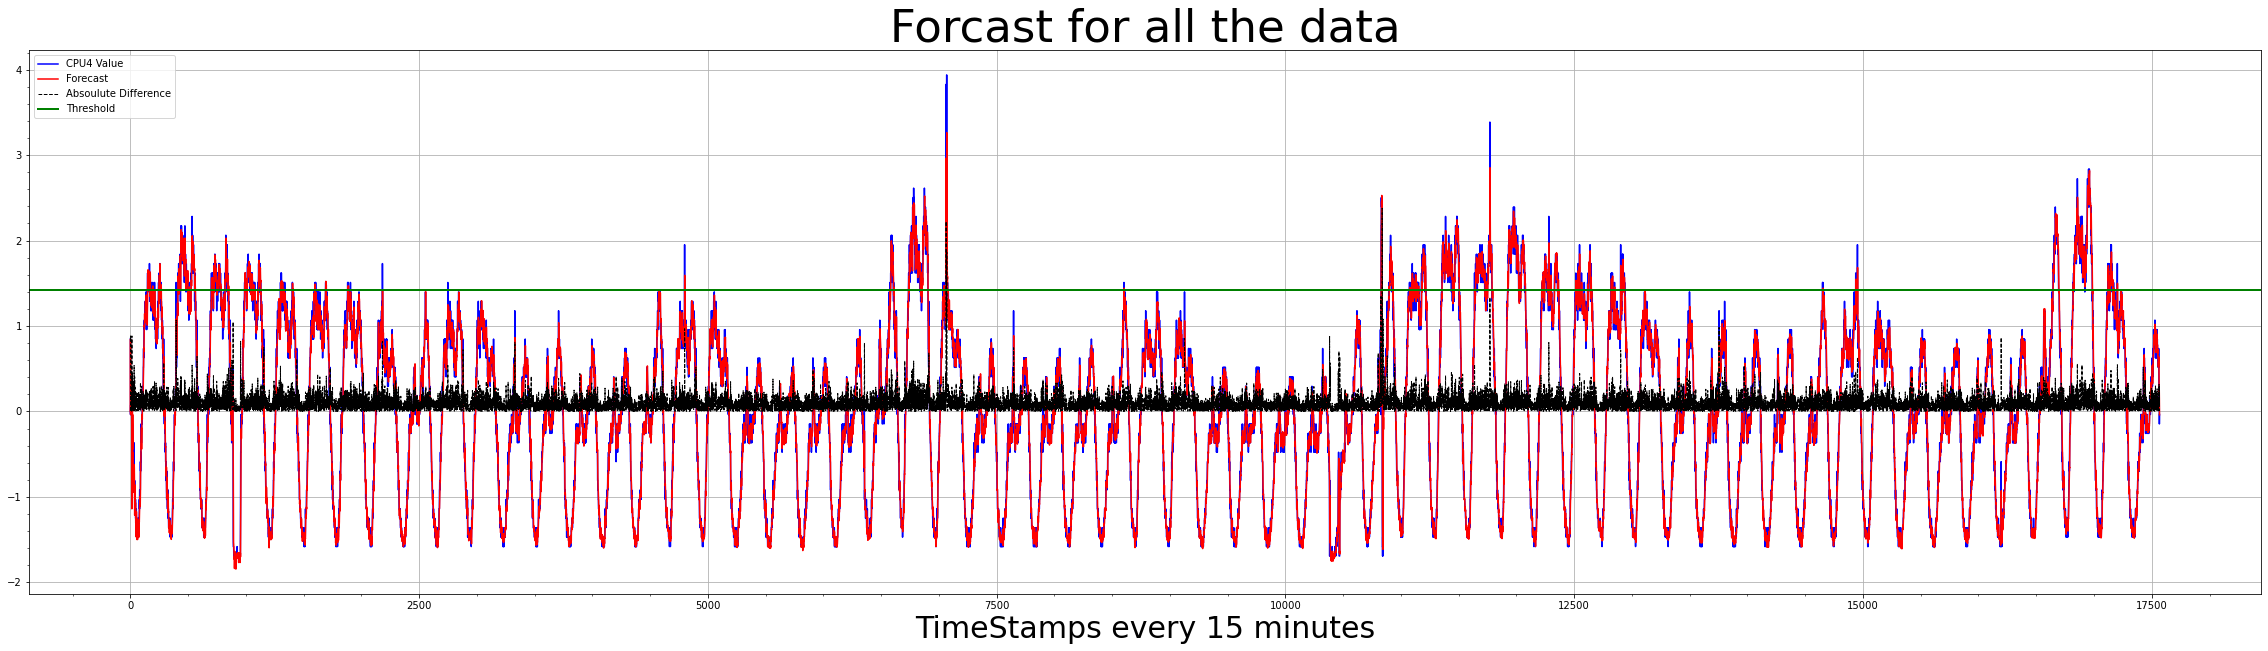

In [18]:
plt.figure(figsize=(40,10))
plt.plot(df['value'], label='CPU4 Value', linewidth='1.5', color='blue')
plt.plot(forecast2, label='Forecast', linewidth='1.5', color='red')
plt.plot(difference, 'g--',  label='Absoulute Difference', linewidth='1', color='black')
plt.axhline(threshold, label='Threshold', linewidth='2', color='green')
plt.legend(loc='upper left')

plt.title("Forcast for all the data", fontsize=45)
plt.xlabel("TimeStamps every 15 minutes", fontsize=30)

plt.minorticks_on()
plt.grid()

#plt.savefig("Forcast for all the data.png")

In [19]:
difference[3500]

0.11922277545706761

In [20]:
anomaly=[]
for i in range(len(df)):
    anomaly.append(i)
    

In [21]:
anomaly[89]

89

In [33]:
anomaly=[]
a=0
n=0
for i in range(len(df)):
    if difference[i] > threshold:
        anomaly.append(1)
        a=a+1
    elif difference[i] <= threshold:
        anomaly.append(0)
        n=n+1
        
print(f"Anomalies :{a}")
print(f"No Anomalies :{n}")

Anomalies :6
No Anomalies :17562


In [31]:
print(len(anomaly))

17568


In [23]:
label=df['label']

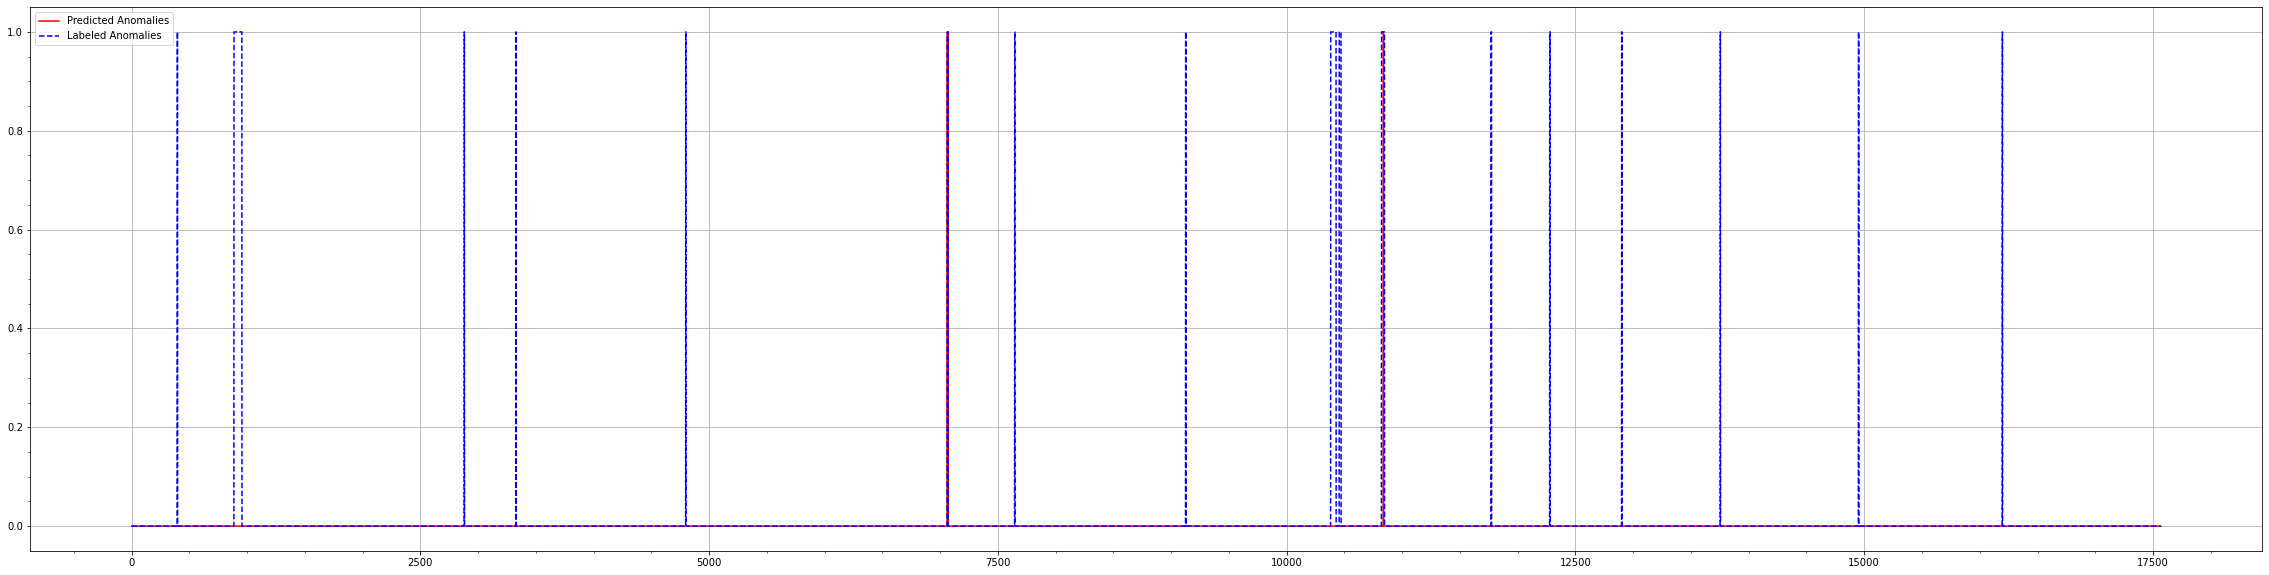

In [24]:
anomaly=np.array(anomaly)
plt.figure(figsize=(40,10))
plt.plot(anomaly, label='Predicted Anomalies', linewidth='1.5', color='red')
plt.plot(label, 'r--', label='Labeled Anomalies', linewidth='1.5', color='blue')
plt.legend(loc='upper left')

plt.minorticks_on()
plt.grid()

In [28]:
tp=0
fp=0
tn=0
fn=0
for i in range(len(df)):
    if anomaly[i] == 1 and label[i] == 1:
        tp=tp+1
    elif anomaly[i] == 1 and label[i] != 1:
        fp=fp+1
    elif anomaly[i] != 1 and label[i] == 1:
        fn=fn+1
    elif anomaly[i] != 1 and label[i] != 1:
        tn=tn+1
            
print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}")
print("########################")
precision=tp/(tp+fp)
print(f"Precision: {round(precision,3)}")

recall=tp/(tp+fn)
print(f"Recall: {round(recall,3)}")

F1_Score=(2*precision*recall)/(precision+recall)
print(f"F1 Score: {round(F1_Score,3)}")

True Positives: 6
False Positives: 0
True Negatives: 17359
False Negatives: 203
########################
Precision: 1.0
Recall: 0.029
F1 Score: 0.056
